In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as mt

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
x = np.array(df['Glucose'])
print(x)

[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 115 126  99 196 119 143 125 147  97 145 117 109 158  88  92 122 103
 138 102  90 111 180 133 106 171 159 180 146  71 103 105 103 101  88 176
 150  73 187 100 146 105  84 133  44 141 114  99 109 109  95 146 100 139
 126 129  79   0  62  95 131 112 113  74  83 101 137 110 106 100 136 107
  80 123  81 134 142 144  92  71  93 122 163 151 125  81  85 126  96 144
  83  95 171 155  89  76 160 146 124  78  97  99 162 111 107 132 113  88
 120 118 117 105 173 122 170  84  96 125 100  93 129 105 128 106 108 108
 154 102  57 106 147  90 136 114 156 153 188 152  99 109  88 163 151 102
 114 100 131 104 148 120 110 111 102 134  87  79  75 179  85 129 143 130
  87 119   0  73 141 194 181 128 109 139 111 123 159 135  85 158 105 107
 109 148 113 138 108  99 103 111 196 162  96 184  81 147 179 140 112 151
 109 125  85 112 177 158 119 142 100  87 101 162 197 117 142 134  79 122
  74 171 181 179 164 104  91  91 139 119 146 184 12

In [4]:
y = np.array(df['Outcome'])
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

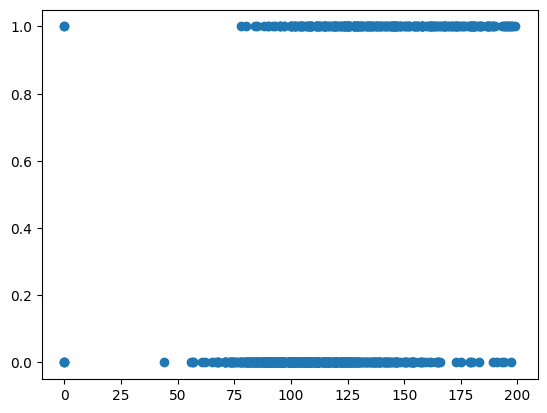

In [5]:
plt.scatter(x,y)
plt.show()

In [6]:
def sigmoid(y):
    t = 1 + np.exp(-1*y)
    return (1/t)

In [7]:
def P(b0,b1,x):
    return ( sigmoid(b0+b1*x) )

In [8]:
def cost(b0,b1,x,y):
    m = len(x)
    sum = 0
    for i in range(m):
        sum += (y[i] * np.log(P(b0,b1,x[i]) + 0.01) + (1-y[i]) * np.log( (1 - P(b0,b1,x[i])) + 0.01 )) 
    return (-1)*(sum/m)

In [14]:
def GD(x,y):
    b0 = 10
    b1 = 20
    lemda = 0.0001

    epoch = 0
    
    while(True):
        old_cost = cost(b0,b1,x,y)
        b0_derivative = 0
        b1_derivative = 0
        for i in range(len(x)):
            b0_derivative += (b0_derivative + (P(b0,b1,x[i]) - y[i]))
            b1_derivative += (b1_derivative + (P(b0,b1,x[i]) - y[i])*x[i])
        #print(P(b0,b1,x[i]))
        #print(P(b0,b1,x[i]) - y[i])
        print('beta0',b0_derivative)
        b0 = b0 - lemda*b0_derivative
        b1 = b1 - lemda*b1_derivative
        new_cost = cost(b0,b1,x,y)
        print(new_cost)
        if(abs(old_cost - new_cost) < 0.00000001):
            print('After '+ str(epoch) + ' epoch')
            break
        epoch += 1
    return b0,b1
        

In [15]:
b0,b1 = GD(x,y)
b0,b1

beta0 5.164361875140887e+230
1.600534432836237
beta0 -1.0360819047866201e+231
2.994685422298696
beta0 5.164361875140887e+230
2.994685422298696
After 2 epoch


C:\Users\USER\AppData\Local\Temp\ipykernel_11364\1442646545.py:2: RuntimeWarning: overflow encountered in exp
  t = 1 + np.exp(-1*y)


(3.209529758442722e+224, 6.837709324321545e+228)

In [11]:
def Ypred(b0,b1,x):
    res = []
    for i in range(len(x)):
        if(P(b0,b1,x[i]) >= 0.5):
            res.append(1)
        else:
            res.append(0)
    return res

In [12]:
pre = Ypred(b0,b1,x)

In [13]:
pre

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [116]:
float(tf.math.sigmoid(1110.89))

1.0

In [183]:
mt.pow(10,-240)

1e-240